### Introduction  
The analysis below will try to answer the volatility of airfare price, the closer departure date comes.  
The hypotesis is that the closer the departure date comes prices will be increasing.  
The exception to the rule is a short period from the departure date, where aircarrier companies try to cut fixed costs by offering cheaper seats.  
  
The dataset is based on a sample collected between January and May of 2019.

### 1. IMPORTING NECESSARY PACKAGES  
The project will require:  
 - NumPy and Pandas for Data Frames  
 - Matplotlib for visualization purposes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 2. PREPARING THE DATA

In [2]:
# Loading data
airfares = pd.read_csv(r"C:\Users\Gordan\Desktop\Data Analyst\Projects\Airfare volatility\airfares.csv")

In [3]:
# Get general overview of the data
airfares.head()

,observation_date,observation_time,origin,destination,market,carrier,flight_number,departure_date,departure_time,fare_basis,booking_class,price_exc_tax,tax,price,currency
0,2019-01-12,02:33:00,BOS,LGA,BOSLGA,BB,2118,2019-05-02,14:00:00,B63AA,B,63.26,19.04,82.3,USD
1,2019-01-12,02:36:00,BOS,LGA,BOSLGA,BB,2118,2019-05-12,14:00:00,B63AA,B,63.26,19.04,82.3,USD
2,2019-01-12,02:33:00,BOS,LGA,BOSLGA,BB,2118,2019-05-01,14:00:00,B63AA,B,63.26,19.04,82.3,USD
3,2019-01-12,02:34:00,BOS,LGA,BOSLGA,BB,2118,2019-05-06,14:00:00,B63AA,B,63.26,19.04,82.3,USD
4,2019-01-12,02:35:00,BOS,LGA,BOSLGA,BB,2118,2019-05-07,14:00:00,B63AA,B,63.26,19.04,82.3,USD


In [4]:
# Check if there are any null values and if any what is the mean to evaluate any action is needed
print(airfares.isnull().mean())

observation_date    0.00000
observation_time    0.00000
origin              0.00000
destination         0.00000
market              0.00000
carrier             0.00000
flight_number       0.00000
departure_date      0.00000
departure_time      0.00000
fare_basis          0.00000
booking_class       0.00000
price_exc_tax       0.00498
tax                 0.00498
price               0.00000
currency            0.00000
dtype: float64


In [5]:
# Check how many currencies are there, as for this analysis it is important they are unified (in this case USD)
airfares['currency'].unique()

array(['USD'], dtype=object)

In [6]:
# It is very important properly format date as months bellow 12 get mistaken for days.
airfares['observation_date'] = pd.to_datetime(airfares['observation_date'], dayfirst=True)
airfares['departure_date'] = pd.to_datetime(airfares['departure_date'], dayfirst=True)

### 3. CALCULATING AND PLOTING FINDINGS

In [7]:
# calculating difference between observation date and departure date and making sure it is formated as days, not just simple number
airfares['number_of_days_out'] = (airfares['departure_date'] - airfares['observation_date']).dt.days

In [8]:
# calculating volatility of price based on number of days out
volatility_by_number_of_days_out = airfares.groupby('number_of_days_out')['price'].std()

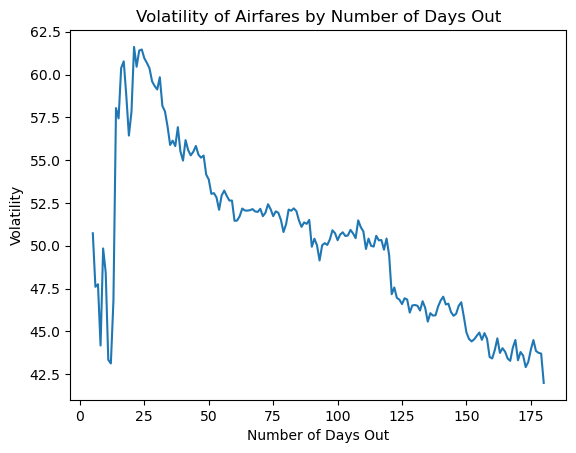

In [9]:
plt.plot(volatility_by_number_of_days_out)
plt.xlabel('Number of Days Out')
plt.ylabel('Volatility')
plt.title('Volatility of Airfares by Number of Days Out')
plt.show()

### Conclusion  
Generally speaking, the prices are more volatile the closer they get to the departure date.  

The closer to the departure date, the more expensive the price. More seats tend to fill the closer to the departure date. Planning trips several months in advance is generally a luxury for the majority of consumers.
As more tickets sell for any given flight, the demand increases creating a jump in ticket prices.

The exception to the forementioned rule is around 30 days before departure. Some cheaper classes of airfares are only available 30 days before departure. Airlines need to make a minimum amount of money per passenger to accommodate the time, space, and fuel used for the aircraft. Therefore, whatever seats are available in short period before departure needs to be sold cheaper to encourage full occupancy.